# Objective

Perform exploratory and statistical analysis of games sales, of users and experts scores, and identify patterns that determine the success of a game to generate insight for future decision-making. 

# Data
- `Name` — game's name
- `Platform` — platform
- `Year_of_Release` — year of release
- `Genre` — game's genre
- `NA_sales` — sales in North America (millions of copies sold)
- `EU_sales` — sales in Europe (millions of copies sold)
- `JP_sales` — sales in Japan (millions of copies sold)
- `Other_sales` — sales in other countries (millions of copies sold)
- `Critic_Score` — critics score (max 100)
- `User_Score` — users score (max 10)
- `Rating` — ESRB rating (Entertainment Software Rating Board). This organization determines the rating of computer games and assigns them a suitable age category.

The data used in this project contains information from 1980 to 2016. For 2016 year data is incomplete.

# Outline

#### Step 1. Libraries & Data loading

#### Step 2. Data Preprocessing

#### Step 3. EDA
* How many games were released in different years.
* How sales have changed by platform. How long does it take for new platforms to appear and old platforms to disappear?
* Which platforms are leading in terms of sales?
* How users and critics score influence the sales within one popular platform.
* What genres are people playing?
* Determine for users of each region (NA, EU, JP) the following:
  - top-5 popular platforms
  - top-5 popular genres
  - Does ESRB influence the sales?

#### Step 4. SDA
Test the following hypotheses:
* The average user score for the Xbox One and PC platforms are the same;
* The average user score for Action and Sports genres are the same.

#### Step 5. Summary

<a id='1'></a>
# Step 1. Libraries & Data loading

In [1]:
import warnings
warnings.filterwarnings('ignore')

## Libraries

In [2]:
import pandas as pd

# отрисовка графиков
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
sns.set(rc={'figure.figsize':(12,6)})

# статистика
import numpy as np
from scipy import stats as st

## Data loading

In [3]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

data.info()
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Summary
* Column names shoud be converted to lowercase
* After the initial study NaNs were revealed in the columns: `critic_score`,` user_score`, `rating`,` Year_of_Release`, `year_of_release`,` name`, `genre`.
* Inappropriate data type in the following columns: `year_of_release`, `critic_score`, `user_score`

<a id='2'></a>
# Этап 2. Data preprocessing

correcting columns names

In [4]:
print(data.columns)
data.columns = data.columns.str.lower()
data.head()

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Checking for duplicates

In [5]:
data.duplicated().sum()

0

Let's count total sales of all markets

In [6]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [7]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

Deleting small amount of NaNs in `genre` and `name`

In [8]:
display(data[data['name'].isnull() == True])
data.dropna(subset=['name'], inplace=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Checking NaNs in `year_of_release`

In [9]:
data[data['year_of_release'].isnull() == True].sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
13929,Sega Rally 2006,PS2,NaN,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04
1699,Hitman 2: Silent Assassin,XB,NaN,Action,0.76,0.38,0.00,0.05,84.0,8,M,1.19
4294,The Chronicles of Riddick: Escape from Butcher...,XB,NaN,Shooter,0.32,0.11,0.00,0.02,89.0,8.9,M,0.45
8918,All-Star Baseball 2005,XB,NaN,Sports,0.11,0.03,0.00,0.01,75.0,8.8,E,0.15
10317,Happy Feet Two,PS3,NaN,Action,0.09,0.00,0.00,0.01,NaN,NaN,NaN,0.10
6899,Danganronpa: Trigger Happy Havoc,PSP,NaN,Misc,0.00,0.00,0.24,0.00,NaN,NaN,NaN,0.24
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01
11943,Dream Trigger 3D,3DS,NaN,Shooter,0.04,0.02,0.00,0.01,54.0,6.3,E,0.07
15953,PDC World Championship Darts 2008,DS,NaN,Sports,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


We can restore NaNs for games which have year in the end of name

In [10]:
# pull year from name
def split_func(line):
    ''' Возвращает последнее слово из строки столбца 'name'
    '''
    try:
        return int(line.split()[-1])
    except:
        return 0

data['name_last_word'] = data['name'].apply(split_func)
data[(data['year_of_release'].isnull()) & (data['name_last_word'] > 0)].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_last_word
7605,Famista 64,N64,NaN,Sports,0.00,0.00,0.17,0.03,NaN,NaN,NaN,0.20,64
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01,2008
3233,Test Drive Unlimited 2,PS3,NaN,Racing,0.16,0.34,0.01,0.12,70.0,6.1,T,0.63,2
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E,0.32,2005
2969,Test Drive Unlimited 2,X360,NaN,Racing,0.30,0.31,0.00,0.07,68.0,6.4,T,0.68,2


In [11]:
# difference in real year of release and year in the name
data['year_check'] = data['year_of_release'] - data['name_last_word']
data[data['name_last_word'] > 1900].sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,name_last_word,year_check
3875,Jampack Winter 2002,PS2,2002.0,Misc,0.25,0.20,0.0,0.07,NaN,NaN,NaN,0.52,2002,0.0
10579,Olympic Summer Games: Atlanta 1996,PS,1996.0,Sports,0.06,0.04,0.0,0.01,NaN,NaN,NaN,0.11,1996,0.0
16115,Ship Simulator 2008,PC,2007.0,Simulation,0.00,0.01,0.0,0.00,62.0,6.6,E,0.01,2008,-1.0
9270,World Tour Soccer 2002,PS2,2001.0,Sports,0.07,0.05,0.0,0.02,77.0,7.5,E,0.14,2002,-1.0
9586,Torino 2006,PS2,2006.0,Sports,0.06,0.05,0.0,0.02,NaN,NaN,NaN,0.13,2006,0.0


In [12]:
print('Пропусков в столбце year_of_release: {:.2%}'.format(data['year_of_release'].isnull().sum() / len(data)))

Пропусков в столбце year_of_release: 1.61%


Other NaNs in year is less than 1% - just drop it

In [13]:
display(data[data['name_last_word'] > 1900]['name_last_word'].value_counts().head(10)) # все с 2000г
data = data.drop(['name_last_word'], axis=1).drop(['year_check'], axis=1)

2002    69
2000    56
2004    55
2010    46
2001    44
2003    44
2005    42
2011    40
2009    38
2008    31
Name: name_last_word, dtype: int64

Checking NaNs in`rating`, `user_score` и `critic_score`

In [14]:
display(data[data['rating'].isnull()].head())
print(data[data['rating'].isnull()].head().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67


name               Super Mario Bros.Pokemon Red/Pokemon BlueTetri...
platform                                                NESGBGBNESDS
year_of_release                                                 9959
genre                    PlatformRole-PlayingPuzzleShooterSimulation
na_sales                                                       99.53
eu_sales                                                       26.31
jp_sales                                                       23.46
other_sales                                                     5.56
critic_score                                                       0
user_score                                                         0
rating                                                             0
total_sales                                                   154.86
dtype: object


We can see that NaNs in `rating`,` user_score` and `critic_score` occur in the same raws and more often where there is little revenue. Perhaps the games were not popular enough and there were few scores, or they were designed for the local market and there are no scores in the source from which the data was taken. It would be advisable to leave NaNs as they are or replace them with prominent value.

In [15]:
data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [16]:
table = data.pivot_table(index='genre', columns='rating', values='name', 
                        aggfunc='count', margins=True, fill_value=0)

table = table.div(table.iloc[:,-1], axis=0).multiply(100).round(2)
table.drop(['All'], axis=1).style.bar(axis=1)

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
Action,0.050000,19.010000,21.980000,0.050000,0.000000,27.790000,0.000000,31.120000
Adventure,0.000000,36.320000,15.250000,0.450000,0.000000,22.200000,0.000000,25.780000
Fighting,0.000000,1.830000,4.340000,0.000000,0.000000,11.190000,0.000000,82.650000
Misc,0.000000,51.810000,18.930000,0.570000,0.110000,1.470000,0.000000,27.100000
Platform,0.000000,62.920000,25.310000,0.000000,0.000000,0.530000,0.000000,11.250000
Puzzle,0.000000,84.500000,12.570000,0.000000,0.000000,0.000000,0.000000,2.920000
Racing,0.000000,67.090000,11.010000,0.000000,0.000000,2.060000,0.110000,19.720000
Role-Playing,0.000000,10.810000,14.290000,0.000000,0.000000,20.850000,0.000000,54.050000
Shooter,0.000000,4.710000,5.690000,0.000000,0.000000,55.450000,0.000000,34.150000


It is possible to restore NaNs in the `rating` column based on the genre, for example, most likely` Shooter` will get rating M, `Fighting` - T,` Puzzle` - E, but since there are a lot of NaNs - about 40%, it can strongly affect the distribution. Therefore, I desided to restore NaNs with non-characteristic values, for example, **- 1** and just filter it if needed.

In [17]:
data = data.fillna(-1)
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

tbd = to be determined и RP = rating pending, in fact for us this is the same as NaN, so I replace the value with **-1**

In [18]:
data['user_score'].replace('tbd', -1, inplace=True)
data['rating'].replace('RP', -1, inplace=True)
data[data['user_score'] == 'tbd']
data[data['user_score'] == 'RB']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


Now that NaNs have been processed, we can change data type for `year_of_release`,`critic_score`, `user_score`

In [19]:
for i in ['year_of_release', 'critic_score', ]:
    data[i] = data[i].astype('int16')
data['user_score'] = data['user_score'].astype('float16')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int16  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int16  
 9   user_score       16713 non-null  float16
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float16(1), float64(5), int16(2), object(4)
memory usage: 1.4+ MB


## Summery

It was impossible to fill in the NaNs with close values, so we simply replaced it with an uncharacteristic value of -1 for further filters. NaNs in years can be attributed to a specific period, such as the 2000s.

The reasons for NaNs can be different, for example, in the columns in `critic_score` and` user_score`the lack of scores is possible due to the unpopularity of the game. There may be no data in `rating` at the time the game was added to the database, and in` year_of_release` there may be an error in loading or writing data. If the data is taken from open sources, it is possible that not all of the data was in this source.

<a id='3'></a>
# Step 3. EDA

### 1. how many games were released in different years

In [20]:
(data['year_of_release'].value_counts()).sort_index()
data.pivot_table(index='year_of_release', values='total_sales', aggfunc=['count', 'sum']).style.bar()

,count,sum
,total_sales,total_sales
year_of_release,,
-1,269,98.920000
1980,9,11.380000
1981,46,35.680000
1982,36,28.880000
1983,17,16.800000
1984,14,50.350000
1985,14,53.950000
1986,21,37.080000


We can highlight 4 periods:
1. 1980-1994 less than 100 games releazed per year
2. 1995-2001 200-300 games
3. 2002-2011 in 2002 spike, in 2006-2011 more than 1000 games released
4. 2012-2016 a decrease in the number of games may be associated with an increased complexity and time frame for creating games

The most interesting will be the last two periods starting in 2000, as more games have been released since this year and these games have more sales.

In [21]:
# отбросим данные до 1995
df = data[data['year_of_release'] >= 1995]

### 2. How sales have changed by platform. How long does it take for new platforms to appear and old platforms to disappear?

In [22]:
platform_pivot = (df.pivot_table(index='platform', values='total_sales', aggfunc=['count', 'sum'])
                  .set_axis(['count', 'sum'], axis='columns')
                  .sort_values(by='sum')
                 )
platform_pivot.style.bar()

,count,sum
platform,,
PCFX,1,0.030000
3DO,2,0.080000
TG16,2,0.160000
NG,6,0.430000
WS,6,1.420000
DC,52,15.950000
SAT,154,29.940000
SNES,91,49.590000
PSV,429,53.810000


In [23]:
(15+29+49)/ df['total_sales'].sum() * 100

1.140417245561263

The largest volume of sales (more than 600 million) have platforms PS, DS, PS3, Wii, X360 and PS2. For them check the distribution by year. 

Text(0, 0.5, 'total_sales')

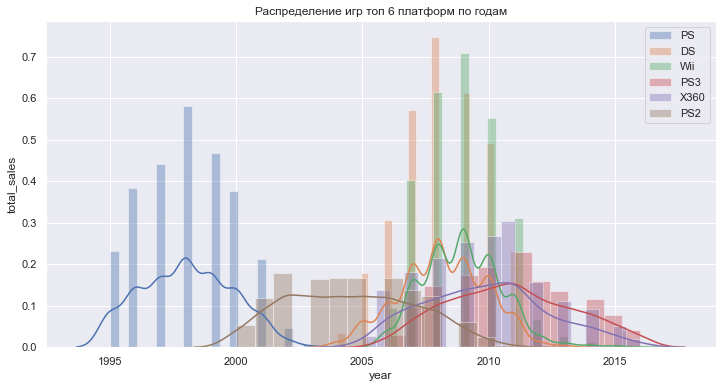

In [24]:
top_platforms = platform_pivot[platform_pivot['sum'] > 600].index.values.tolist()

top_platforms_df = df.query('platform == @top_platforms')[['platform', 'year_of_release', 'total_sales']]

for i in top_platforms:
    sns.distplot(top_platforms_df[top_platforms_df['platform']==i]['year_of_release'], 
                 kde=True, label=i)
plt.legend()
plt.title('Распределение игр топ 6 платформ по годам')
plt.xlabel('year')
plt.ylabel('total_sales')

It is interesting to look at the PC distribution separately

<AxesSubplot:xlabel='year_of_release', ylabel='Density'>

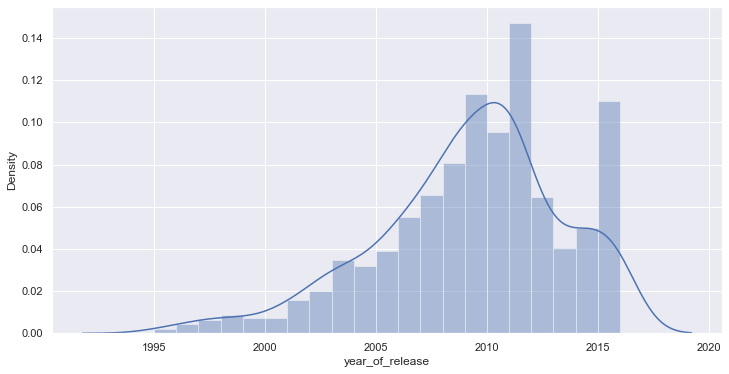

In [25]:
sns.distplot(df[df['platform']=='PC']['year_of_release'], kde=True)

the lifetime of the platform is about 10 years. Therefore, for the prediction, it is optimal to take a period of 5-6 years, that is, when the platform is at the peak of its "life" and it is already possible to draw any conclusions about the potential of the platform, while there is still time for prediction. During this period we can see which platforms are gaining popularity.

The PC does not fall under this rule and there are several reasons for this. Firstly, this is not only a gaming platform, and secondly, PC is a generalization and there is a large variety of versions and assemblies, according to which the lifetime can most likely be divided into several generations.

### 3. Which platforms are leading in terms of sales?

filtering the table by the optimal period and potentially profitable platforms

In [26]:
new_df = df[df['year_of_release'] >= 2010]
new_df_pivot = new_df.pivot_table(index='platform', columns='year_of_release', 
                                  values='total_sales', aggfunc='sum', margins=True)
new_df_pivot.drop('All', axis=1).style.bar(axis=1)

year_of_release,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,
3DS,nan,63.200000,51.360000,56.570000,43.760000,27.780000,15.140000
DS,85.020000,26.180000,11.010000,1.540000,nan,nan,nan
PC,24.280000,35.030000,23.220000,12.380000,13.280000,8.520000,5.250000
PS2,5.640000,0.450000,nan,nan,nan,nan,nan
PS3,142.170000,156.780000,107.360000,113.250000,47.760000,16.820000,3.600000
PS4,nan,nan,nan,25.990000,100.000000,118.900000,69.250000
PSP,35.040000,17.820000,7.690000,3.140000,0.240000,0.120000,nan
PSV,nan,4.630000,16.190000,10.590000,11.900000,6.250000,4.250000
Wii,127.950000,59.650000,21.710000,8.590000,3.750000,1.140000,0.180000


From this table it also follows that the optimal period is 5 years.
The most interesting platforms to analyse will be PS4, XOne, WiiU, 3DS and PC. Besides PC, all platforms are new versions of themselves and they are the most relevant for analysing. The 3DS was left because there is no other updated version of this platform yet.

selecting potentially profitable platforms and filter the table by them

In [27]:
new_df_pivot['perc'] = new_df_pivot[2016] / new_df_pivot['All'] * 100
platforms = new_df_pivot.drop('All').query('perc > 1').index.values.tolist()

new_top_platforms_df = new_df.query('platform == @platforms')

plotting a distribution of total sales by platform and year

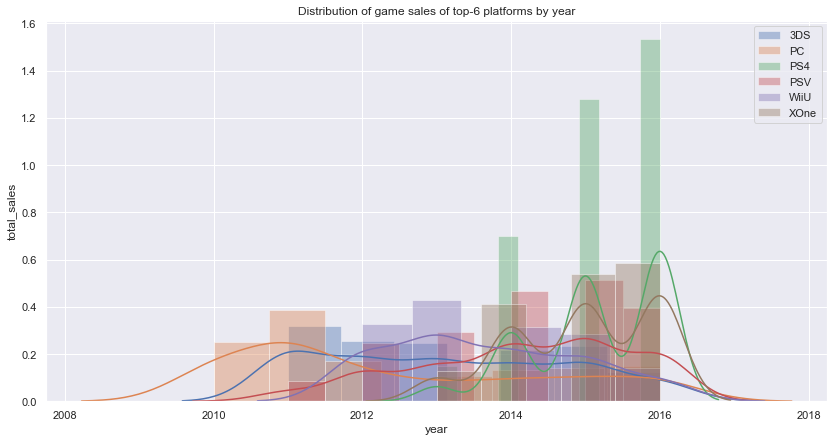

In [28]:
sns.set(rc={'figure.figsize':(14,7)})
for i in platforms:
    sns.distplot(new_top_platforms_df[new_top_platforms_df['platform']==i]['year_of_release'], 
                 kde=True, label=i)
plt.legend()
plt.title('Distribution of game sales of top-6 platforms by year')
plt.xlabel('year')
plt.ylabel('total_sales')
plt.show()

The most relevant are PS4, XOne and the eternal PC, but for now we will not remove the remaining two platforms from analysing, as they may be interesting in relation to the local market.

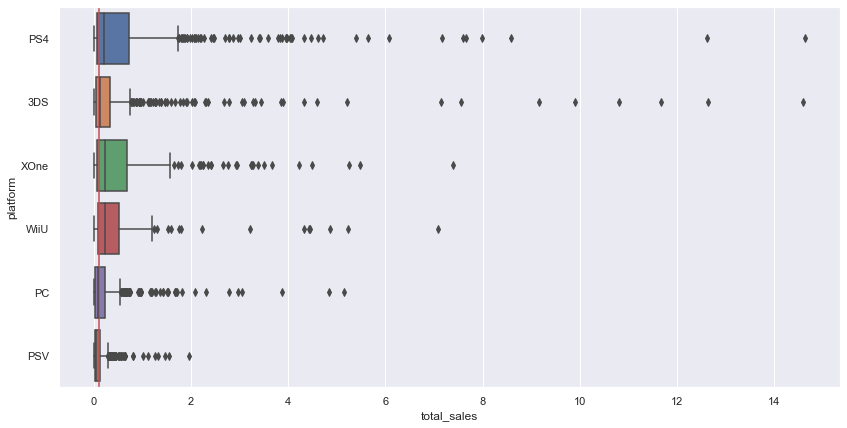

In [29]:
sns.boxplot(y='platform', x='total_sales', data=new_top_platforms_df)
plt.axvline(new_top_platforms_df['total_sales'].median(), color='r')
#plt.xlim(0,8)

Interesting that the median of total sales of all platforms in on the same level, but distribution for all platforms is significantly different.

Market leaders are PS4 and XOne, which have similar distribution patterns.
They are followed by the WiiU and 3DS.
PC is the most tenacious.
PSV seems to have its lifetime coming to an end, so will drop it from analysis. 

In [30]:
platforms = ['PS4','XOne','PC','WiiU', '3DS']
new_top_platforms_df = new_top_platforms_df.query('platform != "PSV"')
new_top_platforms_df['platform'].count()

1777

### 5. How users and critics score influence the sales within one popular platform.

Analysing platform PS4 for example

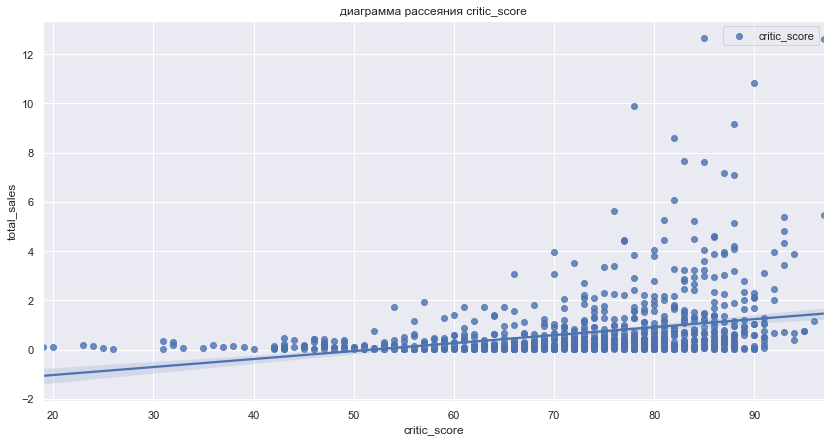

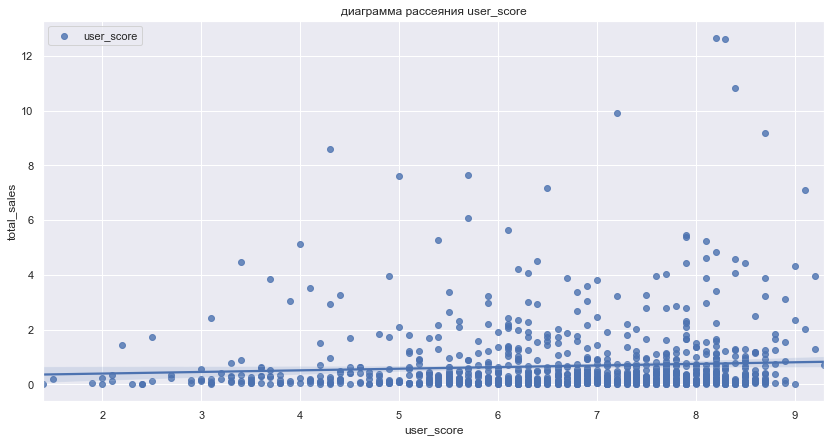

In [31]:
for i in ['critic_score', 'user_score']:
    sns.regplot(x=i, y="total_sales", 
                data=new_top_platforms_df.query('user_score > 0 and critic_score > 0'), 
                label=i)
    plt.title('диаграмма рассеяния ' + i)
    plt.legend()
    plt.show()

In [32]:
print('Coeff. of correlation of sales and critics scores: {:.2f}'
      .format(new_top_platforms_df[new_top_platforms_df['platform']=='PS4']['total_sales'].corr(new_df['critic_score'])))
print('Coeff. of correlation of sales and users scores: {:.2f}'
      .format(new_top_platforms_df[new_top_platforms_df['platform']=='PS4']['total_sales'].corr(new_df['user_score'])))

Coeff. of correlation of sales and critics scores: 0.23
Coeff. of correlation of sales and users scores: 0.12


Judging by the coeff. there is no strong correlation, but looking at the charts, there is a relationship between sales and critics scores. There is almost no relation with users scores.

In [33]:
new_top_platforms_df['platform'].value_counts()

3DS     512
PC      479
PS4     392
XOne    247
WiiU    147
Name: platform, dtype: int64

Correlating our findings with sales of games on other platforms.

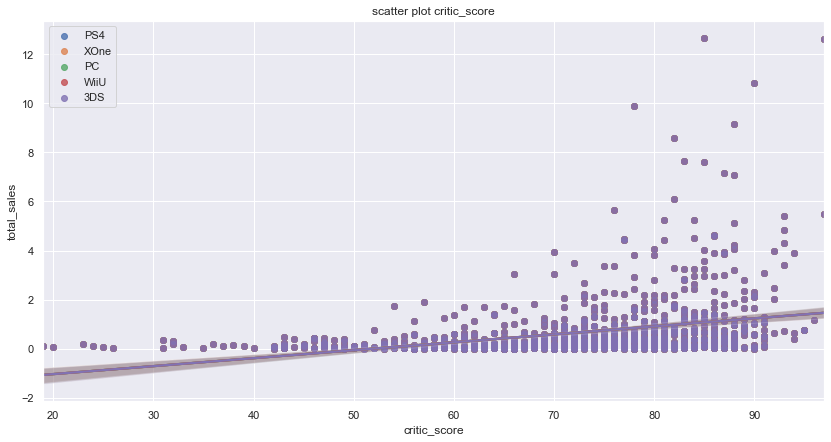

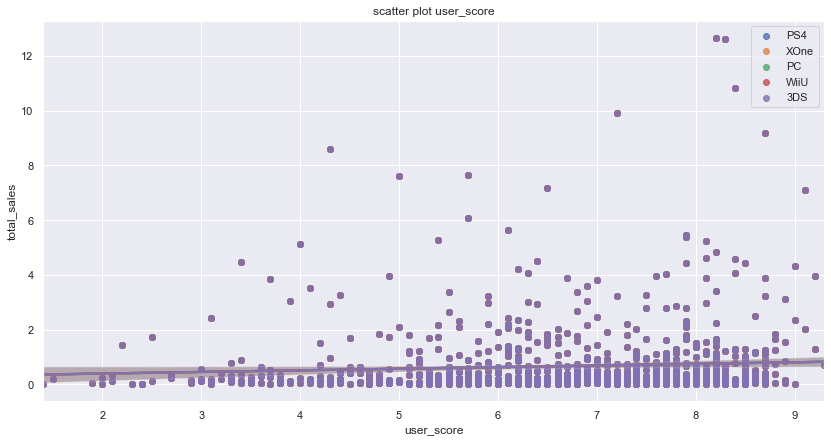

In [34]:
for i in ['critic_score', 'user_score']:
    for j in platforms:
        sns.regplot(x=i, y="total_sales", 
                    data=new_top_platforms_df.query('user_score > 0 and critic_score > 0'), 
                    label=j, scatter=True)
        plt.title('scatter plot ' + i)
        plt.legend()
    plt.show()

In [35]:
new_top_platforms_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.000000,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.000000,-1,14.60
40,Mario Kart 7,3DS,2011,Racing,5.03,4.02,2.69,0.91,85,8.203125,E,12.65
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.296875,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.000000,-1,11.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,-1,-1.000000,T,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,-1,-1.000000,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7.601562,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61,5.800781,T,0.01


Looking at the scatterplot above, we can say that in WiiU and 3DS platforms user scores correlate more with game sales than in other platforms.

In [36]:
print('Coeff. of correlation of sales and critics scores: {:.2f}'
      .format(new_top_platforms_df['total_sales'].corr(new_top_platforms_df['critic_score'])))
print('Coeff. of correlation of sales and users scores: {:.2f}'
      .format(new_top_platforms_df['total_sales'].corr(new_top_platforms_df['user_score'])))

Coeff. of correlation of sales and critics scores: 0.18
Coeff. of correlation of sales and users scores: 0.12


This data sample did not have high sales with low critical ratings, but high critical ratings did not always lead to high sales. With the user scores it is not so simple, there are high sales and low user scores. Perhaps this is due to the fact that critics are less likely to give a low scores. Or critics evaluate games in relation to the audience or market for which a given game is intended, while users may not take this fact into account. Or it is just a coincidence and eventually there will be high sales with low scores.

### 7. What genres are people playing?

In [37]:
top_genres_df_pivot = (new_df.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum'])
                 .set_axis(['count', 'sum'], axis='columns')
                 .sort_values(by='sum'))
top_genres_df_pivot['sales_per_game'] = top_genres_df_pivot['sum'] / top_genres_df_pivot['count']

display(top_genres_df_pivot.style.bar())

# list of top genres
top_genres = top_genres_df_pivot[top_genres_df_pivot['sum'] > 200].index.tolist()

# filter new_df by top genres
top_genres_df = new_df.query('genre == @top_genres')

,count,sum,sales_per_game
genre,,,
Puzzle,114,20.600000,0.180702
Strategy,170,35.840000,0.210824
Adventure,563,61.000000,0.108348
Simulation,217,71.750000,0.330645
Fighting,199,81.590000,0.410000
Platform,153,119.720000,0.782484
Racing,237,122.680000,0.517637
Misc,576,234.560000,0.407222
Role-Playing,568,315.280000,0.555070


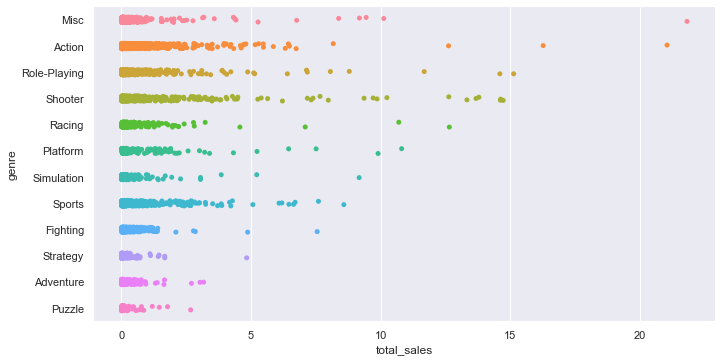

In [38]:
sns.catplot(y="genre", x="total_sales", data=new_df, height=5, aspect=2)
plt.show()

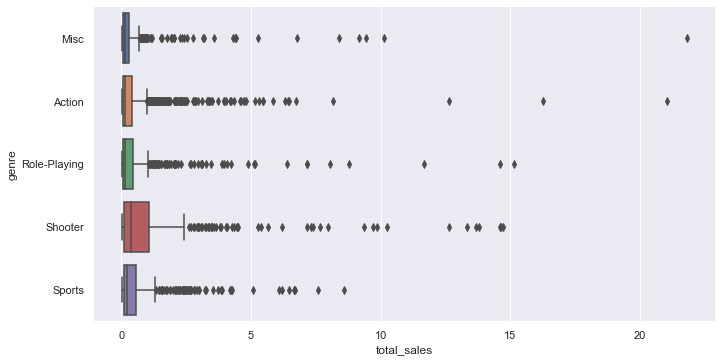

In [39]:
sns.catplot(y="genre", x="total_sales", kind='box', data=top_genres_df, height=5, aspect=2)

Action is the leader in terms of sales and number of released games.
Shooter is the most profitable relatively to the number of games.
The most unprofitable genre is adventure, the number of games is the same as that of Misc, Sport and Role-Playing from the top 5 genres, but the sales volume is 5 times less.

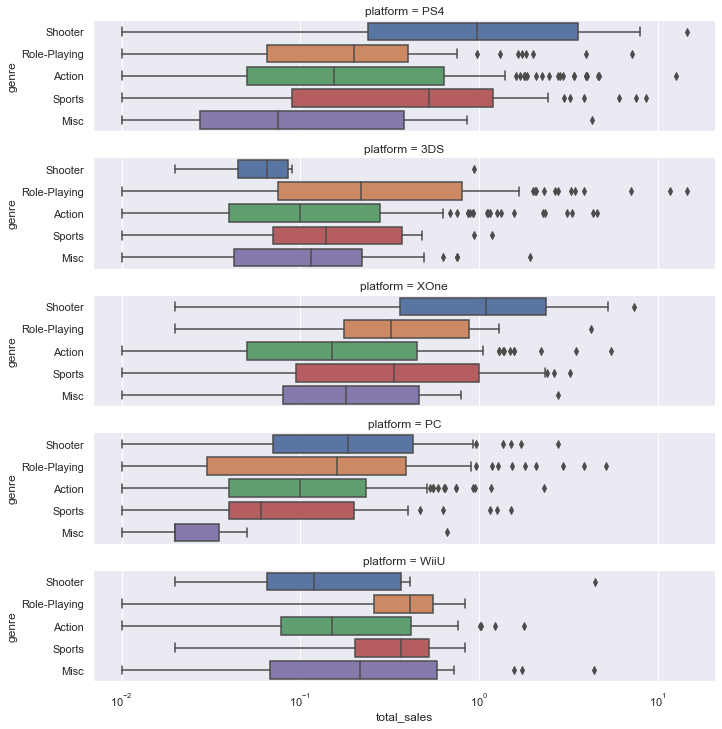

In [40]:
g = sns.catplot(x="total_sales", y="genre", row="platform",
                kind="box", orient="h", height=2, aspect=5,
                data=top_genres_df.query("platform == @platforms"))
g.set(xscale="log");

According to boxplots we cannot say that there are outliers, since there are masterpieces that are strongly knocked out of the total mass and this is normal.

PS4 and XOne genre distribution patterns are similar, as the shooter genre stands out more than other genres on these platforms.
The minimum volume sales of shooter genre in 3DS platform.
On PC the least profitable genre is misc. 

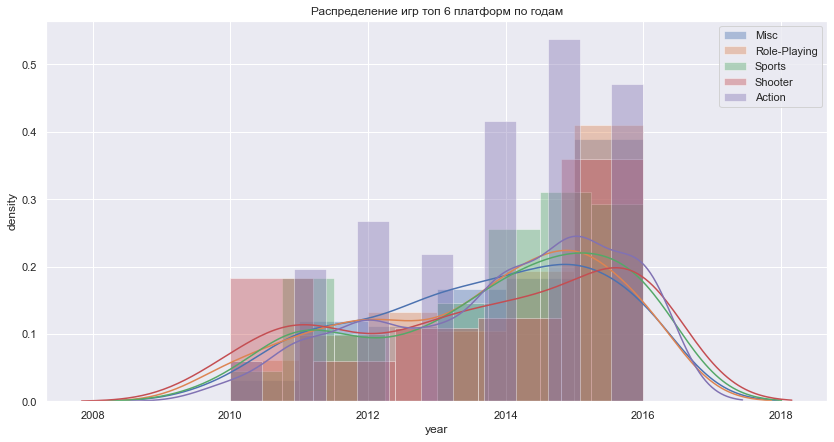

In [41]:
for i in top_genres:
    sns.distplot(new_top_platforms_df[new_top_platforms_df['genre']==i]['year_of_release'], 
                 kde=True, label=i)
    plt.legend()
    plt.title('Распределение игр топ 6 платформ по годам')
    plt.xlabel('year')
    plt.ylabel('density')
plt.show()

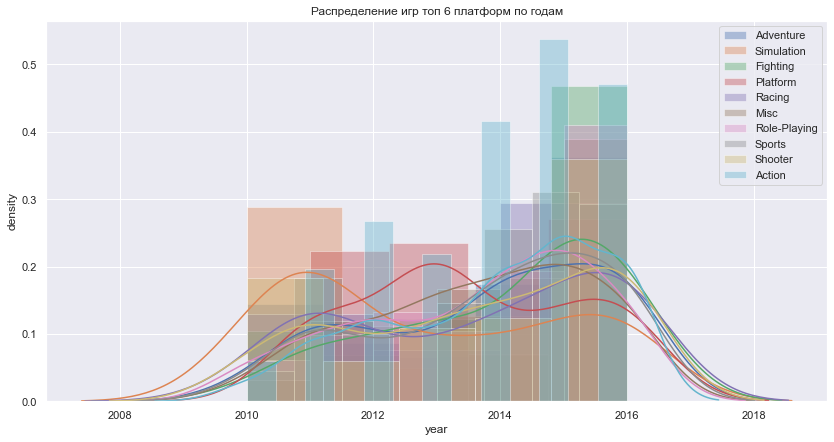

In [42]:
for i in top_genres_df_pivot[top_genres_df_pivot['sum'] > 50].index.tolist():
    sns.distplot(new_top_platforms_df[new_top_platforms_df['genre']==i]['year_of_release'], 
                 kde=True, label=i)
    plt.legend()
    plt.title('Распределение игр топ 6 платформ по годам')
    plt.xlabel('year')
    plt.ylabel('density')
plt.show()

Text(0, 0.5, 'density')

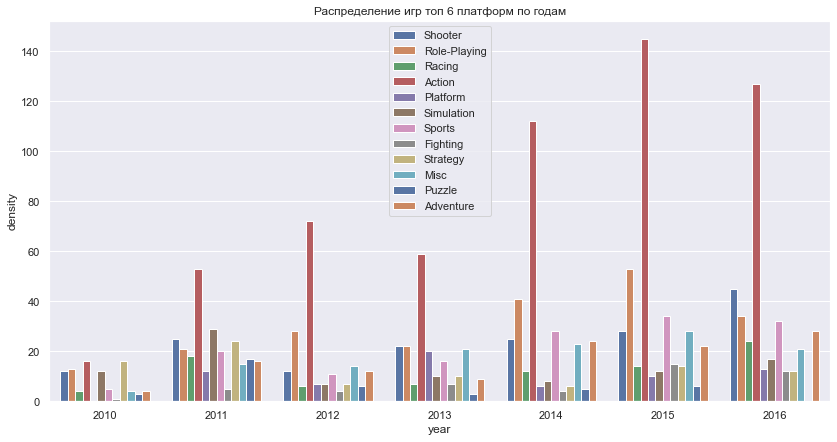

In [43]:
sns.countplot(x='year_of_release', hue='genre',
              data=new_top_platforms_df, palette='deep')
plt.legend()
plt.title('Распределение игр топ 6 платформ по годам')
plt.xlabel('year')
plt.ylabel('density')

We can that games market is growing and developing. For all genres the distribution pattern is approximately similar and there are two peaks in qty released games.

A clear difference in distribution is seen in the Platform and Simulation genres, the volume of released games is higher in the first peak, which may be associated with the кшыштп of new consoles and new technologies for creating games. Perhaps the development of games has moved to a qualitatively new level, and with it Action, Fighting, Sports and some other genres have received a new life and began to attract more attention.

## Summary

1. Significant growth in the gaming market began in the 90s. 
2. The lifetime of the platforms is about 10 years, so the optimal period for analysed is 5-6 years.
3. Top-5 popular platforms now: PS4 и XOne market leaders, which has similar pattern; PC; 3DS; WiiU.   
4. Top-5 genres: Action leader in sales volume and number of games; Shooter leader in terms of profitability per game; Role-Playing; Sport; 
5. The most unprofitable Adventure genre.
6. Coefficient the correlation between sales and scores is not high, but there is a dependence. Moreover, the correlation of sales with the scores of critics is higher than with the scores of users

### 8. Determine for users of each region (NA, EU, JP) the following:

* top-5 popular platforms

In [44]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print()
    print(i)
    display(new_df.pivot_table(index='platform', values=i, aggfunc=['count', 'sum'])
            .set_axis(['count', 'sum'], axis='columns')
            .sort_values(by='sum', ascending=False)[:5]
            .style.bar()
           )


na_sales


,count,sum
platform,,
X360,680,334.180000
PS3,889,229.250000
Wii,450,121.200000
PS4,392,108.740000
XOne,247,93.120000



eu_sales


,count,sum
platform,,
PS3,889,213.600000
X360,680,163.410000
PS4,392,141.090000
PC,479,68.820000
Wii,450,65.910000



jp_sales


,count,sum
platform,,
3DS,512,100.620000
PS3,889,59.260000
PSP,500,42.200000
DS,507,27.900000
PSV,429,21.840000


The leaders of the American and European markets are PS and Xbox, with the Xbox being more popular in the former.    
In the Japanese market, 3DS and PS are in the lead, but the Xbox did not take root (clearly, they support the domestic manufacturer)).

* top-5 popular genres

In [45]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print()
    print(i)
    display(new_df.pivot_table(index='genre', values=i, aggfunc=['count', 'sum'])
            .set_axis(['count', 'sum'], axis='columns')
            .sort_values(by='sum', ascending=False)[:5]
            .style.bar()
           )


na_sales


,count,sum
genre,,
Action,1495,290.640000
Shooter,410,237.470000
Sports,575,156.810000
Misc,576,123.800000
Role-Playing,568,112.050000



eu_sales


,count,sum
genre,,
Action,1495,233.630000
Shooter,410,171.450000
Sports,575,116.840000
Role-Playing,568,75.480000
Misc,576,66.090000



jp_sales


,count,sum
genre,,
Role-Playing,568,103.540000
Action,1495,72.200000
Misc,576,24.290000
Platform,153,15.810000
Adventure,563,15.670000


The top 5 genres for the American and European markets are the same and the leaders are action and shooter, while in Japanese shooter is not in the top five, but role-playing takes the first place. Such a difference may be due to cultural characteristics and preferences, for example, the Japanese do not like conflicts and try to avoid them, or historically, the game market began to develop along the RPG path and around fantasy.

* Does ESRB influence the sales?

In [46]:
for i in ['na_sales', 'eu_sales', 'jp_sales']:
    print()
    print(i)
    display(new_df[new_df['rating'] != -1].pivot_table(index='rating', values=i, aggfunc=['count', 'sum'])
            .set_axis(['count', 'sum'], axis='columns')
            .sort_values(by='sum', ascending=False)[:5]
            .style.bar()
           )


na_sales


,count,sum
rating,,
M,719,382.220000
E,938,271.150000
T,847,160.810000
E10+,603,159.380000
EC,5,1.130000



eu_sales


,count,sum
rating,,
M,719,292.040000
E,938,197.340000
T,847,113.080000
E10+,603,99.280000
EC,5,0.000000



jp_sales


,count,sum
rating,,
E,938,47.870000
T,847,42.110000
M,719,30.450000
E10+,603,13.220000
EC,5,0.000000


<AxesSubplot:xlabel='total_sales', ylabel='rating'>

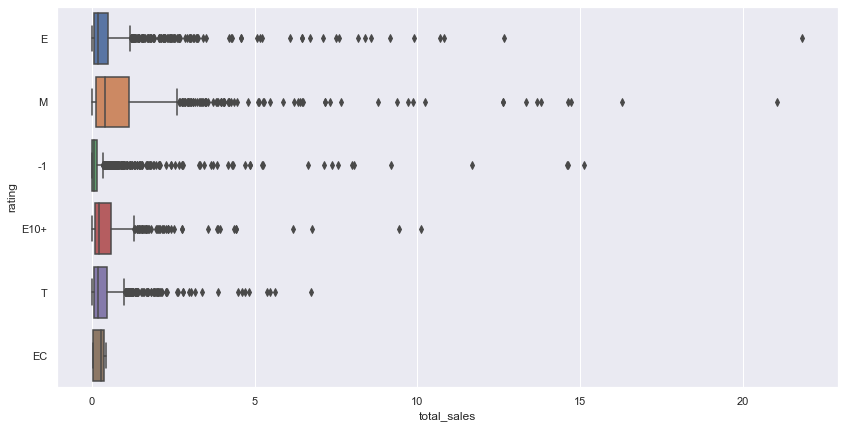

In [47]:
sns.boxplot(y='rating', x='total_sales', data=new_df)
#plt.xlim(0,8)

Games rated "for everyone" are being released in greater volume, but the M rating leads in sales in America and Europe, and in Japan it leads "for everyone".

## Summary

Basically, user behavior in North America and Europe is similar. So the most popular genres are Action and Shooter. The most popular platforms are PS and Xbox, with Xbox in first place in North America, possibly because the Xbox sells less domestically or is easier to support than the overseas PS. The top 5 also includes the WiiU, while in Japan, Nintendo's DS is in the top 5.

The Japanese market is different from American and European. The most popular genres are role-playing and action, but Shooter hasn't caught on in the market. PS and DS are popular platforms, and Xbox is not in the top 5.

<a id='5'></a>
# Step 4. SDA

#### 1. The average user score for the Xbox One and PC platforms are the same;
To compare the mathematical expected value between two samples, we use the Student's t-test.

We will formulate the null hypothesis **Но** the way that equal sign is used: *«The average user score for the Xbox One and PC platforms are equal»*. Based on **Но** we will formulate an alternative hypothesis **Н1**: *«The average user score for the Xbox One and PC platforms are different»*.

To test the hypothesis that the means of two general populations are equal for the samples taken from them, we use the following method `scipy.stats.ttest_ind (array1, array2, equal_var)`.

The samples are presumably taken from populations with similar parameters, so we will leave the parameter equal_var = True.

In [48]:
xbox = new_df.query('platform == "XOne" and user_score > 0')
pc = new_df.query('platform == "PC" and user_score > 0')

print('Sample size of xbox', len(xbox))
print('Sample size of pc', len(pc))
print()

Sample size of xbox 182
Sample size of pc 374



With a small sample size, it is more likely to get a random result, for example, to get a difference in two in the samples when they are homogeneous. With an increase in the sample size, the standard error decreases, random deviations compensate for each other, and it is less likely to obtain a significant difference in the samples with their homogeneity. The standard significance levels are 0.1; 0.05; 0.01; 0.001.

In our case, the sample contains more than 100 observations, so it is reasonable to set the significance level to 0.1.

In [49]:
alpha = 0.01

results = st.ttest_ind(xbox['user_score'], pc['user_score'])

print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 0.9771421555211608
Failed to reject the null hypothesis


The obtained p-value indicates that if there are differences in the average ratings of the Xbox and PC, with a probability of almost 98%, such or greater difference can be obtained by chance. This is clearly too high a probability to conclude that there is any difference between them. Got a **statistically significant difference**.

#### 2. The average user score for Action and Sports genres are the same.

**Но**: *«The average user score for Action and Sports genres are the same»*  
**Н1**: *«The average user score for Action and Sports genres are different»*

In [50]:
action = new_df.query('genre == "Action" and user_score > 0')
sports = new_df.query('genre == "Sports" and user_score > 0')

print('Sample size of xbox', len(action))
print('Sample size of pc', len(sports))
print()

Sample size of xbox 779
Sample size of pc 315



In [51]:
alpha = 0.01

results = st.ttest_ind(action['user_score'], sports['user_score'])

print('p-value:', results.pvalue)
if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 8.813631773506242e-19
Rejecting the null hypothesis


We got a very small p-value, which gives us reason to discard Ho, thus. there are **statistically significant differences** between the average scores of the Action and Sports genres.
In other words, the average scores differ and it is possible to obtain such differences by chance with a very small probability, much less than alpha, this gives reason to discard Ho.

### Summary

We could not reject the hypothesis that the average user scores of the Xbox One and PS platforms are equal - with a 90% probability they are equal. But there are statistically significant differences between the average user scores of the Action and Sports genres, which gives reason to reject the hypothesis of their equality.

<a id='6'></a>
# Summary

- The average life cycle of a platform is 10 years, so the best period for analysis, which will help to predict next year game sales, is 5 years.
- The main leaders in selected period are PS, XOne and DS3, which are likely to hold the leading position for another couple of years. At the same time, the positions of the top platforms change depending on the market. PC does not occupy the top positions, but it has a long life cycle.
- Based on the results of statistical analysis, we can say that with a probability of 98%, the average user score of XOne and PC is the same.
- The top genre in all analysed markets is Action. This genre has the most qty of games and the most colume of sales. Further, the first place differs depending on the market: North America and Europe - Shooter, Japan - Role-Playing. Based on the results of statistical tests, we rejected the hypothesis about the equality of the average user score for the Action and Sports genres.